In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../../')

In [3]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *

/Users/andrewshaw/miniconda3/envs/midi/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Generate Music with Pretrained Model

In [4]:
# Location of your midi files
midi_path =  Path('data/midi/examples')

# Location of saved datset
data_path = Path('data/numpy/pretrained')

### MusicTransformer

In [5]:
# Data
data = MusicDataBunch.empty(data_path)
vocab = data.vocab

In [7]:
# Pretrained Model
# Download pretrained model if you haven't already
pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MusicTransformerKeyC.pth'
# pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MusicTransformer.pth'
pretrained_path = data_path/Path(pretrained_url).name
download_url(pretrained_url, dest=pretrained_path)

In [ ]:
# # Learner
# config = music_config()
# learn = music_model_learner(data, config=config.copy(), pretrained_path=pretrained_path)

In [8]:
# Learner
config = music_config()
learn = music_model_learner(data, pretrained_path=pretrained_path)

In [9]:
out = learn.save(pretrained_path.stem, config=config)

In [10]:
state = torch.load(out)
state['config']

{'ctx_len': 150,
 'n_layers': 16,
 'n_heads': 8,
 'd_model': 512,
 'd_head': 64,
 'd_inner': 2048,
 'resid_p': 0.1,
 'attn_p': 0.1,
 'ff_p': 0.1,
 'embed_p': 0.1,
 'output_p': 0.1,
 'bias': False,
 'scale': True,
 'act': <Activation.GeLU: 3>,
 'double_drop': True,
 'tie_weights': True,
 'out_bias': True,
 'init': <function fastai.text.models.transformer.init_transformer(m)>,
 'mem_len': 512,
 'mask': True,
 'encode_position': True}

### Loading Multitask

In [5]:
from musicautobot.multitask_transformer import *

In [9]:
# Data
data = MusicDataBunch.empty(data_path)
vocab = data.vocab

In [7]:
# Pretrained Model
# pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MultitaskSmallKeyC.pth'
pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MultitaskSmall.pth'
pretrained_path = data_path/Path(pretrained_url).name
download_url(pretrained_url, dest=pretrained_path)

In [10]:
config = multitask_config();
learn = multitask_model_learner(data, config.copy(), pretrained_path=pretrained_path)

In [11]:
out = learn.save(pretrained_path.stem, config=config)

In [12]:
state = torch.load(out)
state['config']

{'ctx_len': 150,
 'n_heads': 8,
 'd_model': 512,
 'd_head': 64,
 'd_inner': 2048,
 'resid_p': 0.1,
 'attn_p': 0.1,
 'ff_p': 0.1,
 'embed_p': 0.1,
 'output_p': 0.1,
 'bias': True,
 'scale': True,
 'act': <Activation.GeLU: 3>,
 'double_drop': True,
 'tie_weights': True,
 'out_bias': True,
 'init': <function fastai.text.models.transformer.init_transformer(m)>,
 'mem_len': 512,
 'mask': True,
 'enc_layers': 8,
 'dec_layers': 8}

### Loading Large Multitask

In [5]:
from musicautobot.multitask_transformer import *

In [6]:
# Data
data = MusicDataBunch.empty(data_path)
vocab = data.vocab

In [8]:
# Pretrained Model
pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MultitaskLargeKeyC.pth'
# pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MultitaskLarge.pth'
pretrained_path = data_path/Path(pretrained_url).name
download_url(pretrained_url, dest=pretrained_path)

In [9]:
config = multitaskm_config();
learn = multitask_model_learner(data, config.copy(), pretrained_path=pretrained_path)

In [10]:
out = learn.save(pretrained_path.stem, config=config)

In [11]:
state = torch.load(out)
state['config']

{'ctx_len': 150,
 'n_heads': 12,
 'd_model': 768,
 'd_head': 64,
 'd_inner': 3072,
 'resid_p': 0.1,
 'attn_p': 0.1,
 'ff_p': 0.1,
 'embed_p': 0.1,
 'output_p': 0.1,
 'bias': True,
 'scale': True,
 'act': <Activation.GeLU: 3>,
 'double_drop': True,
 'tie_weights': True,
 'out_bias': True,
 'init': <function fastai.text.models.transformer.init_transformer(m)>,
 'mem_len': 512,
 'mask': True,
 'encode_position': True,
 'enc_layers': 12,
 'dec_layers': 12}

## Prediction

#### Choose existing midi file as a starting point

In [11]:
midi_files = get_files(midi_path, recurse=True, extensions='.mid'); midi_files[:4]

[PosixPath('data/midi/examples/Levels - Avicii - Verse.mid'),
 PosixPath('data/midi/examples/Everywhere - Michelle Branch - Chorus.mid'),
 PosixPath('data/midi/examples/Scary Monsters And Nice Sprites - Skrillex - Pre-Chorus.mid'),
 PosixPath('data/midi/examples/I Dont Want To Miss A Thing - Aerosmith - Chorus.mid')]

In [12]:
idx = 3
f = midi_files[idx]; f

PosixPath('data/midi/examples/I Dont Want To Miss A Thing - Aerosmith - Chorus.mid')

#### NextWord/Autocomplete

Trim the song to only a few notes. Model will use these notes a seed and continue the idea

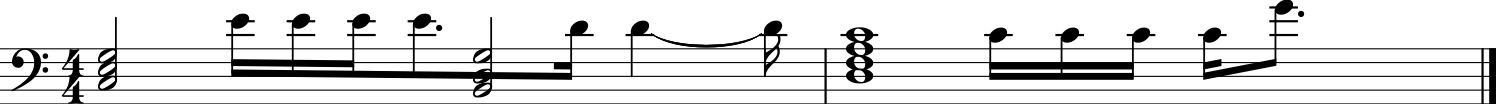

In [13]:
cutoff_beat = 6
item = MusicItem.from_file(f, data.vocab)
seed_item = item.trim_to_beat(cutoff_beat); seed_item.show()

In [14]:
seed_item.split_stream_parts().write('midi', 'la_bamba_snippet.mid')

'la_bamba_snippet.mid'

In [15]:
seed_item.play()

#### Use seed to predict next sequence

In [16]:
pred, full = learn.predict(seed_item, n_words=400, temperatures=(1.1,0.4), min_bars=12, top_k=24, top_p=0.7)

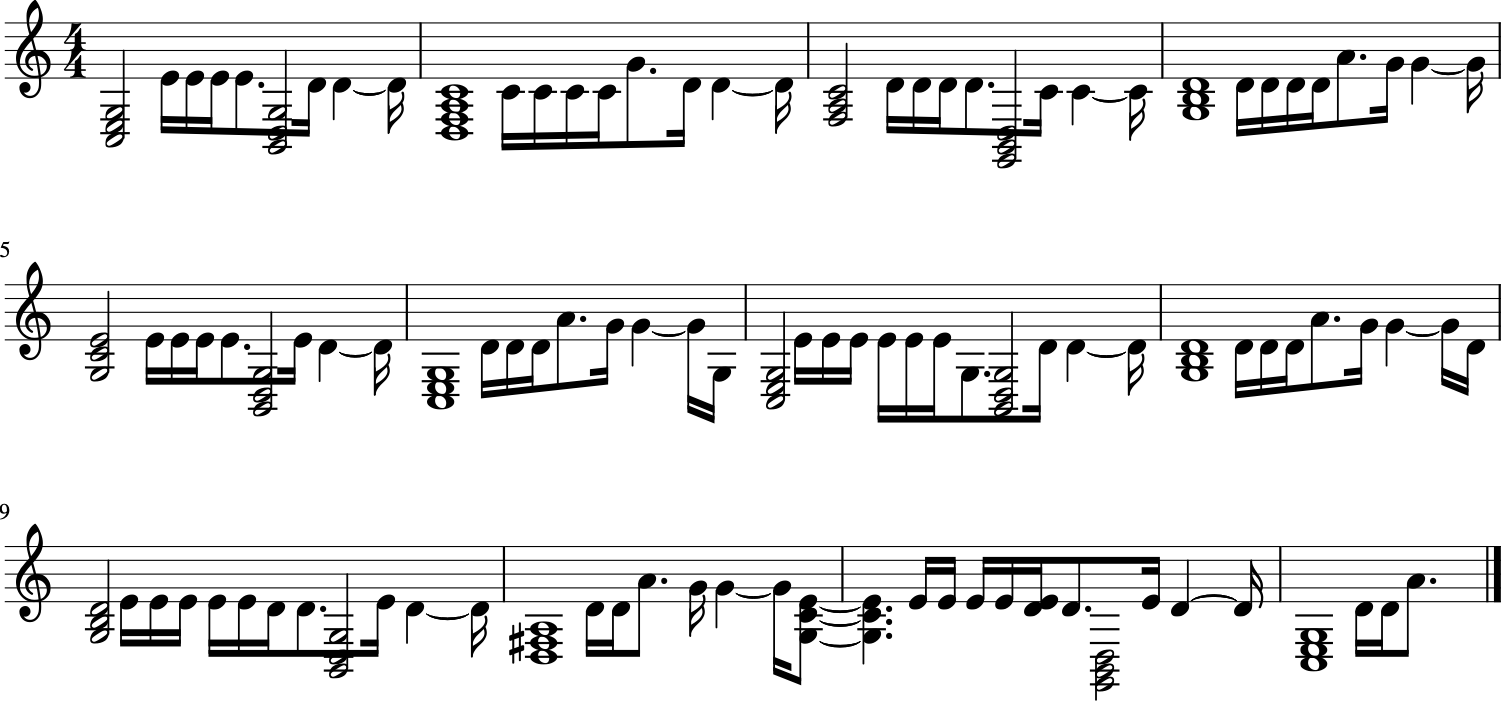

In [17]:
full.show()

In [18]:
full.play()

### For saving to medium

In [17]:
stream = full.split_stream_parts()

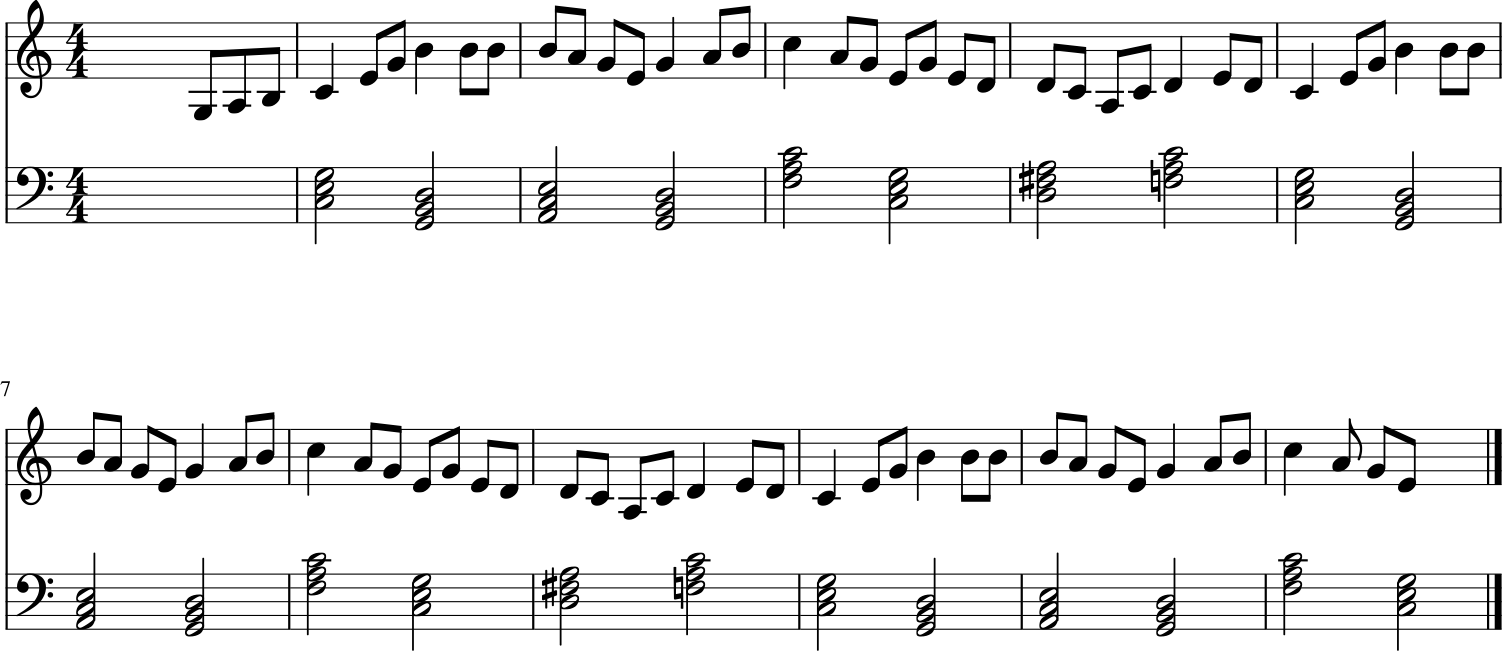

In [18]:
stream.show()

In [19]:
from IPython.display import FileLink, FileLinks

In [20]:
stream.write('midi', 'full_pred.mid')

'full_pred.mid'

In [ ]:
FileLink('full_pred.mid')

#### Add More Randomness to prediction

In [ ]:
note_temp = 1.4 # Determines amount of variation in note pitches
dur_temp = 0.8 # Amount of randomness in rhythm
top_k = 30
pred = learn.predict(seed_item, n_words=400, temperatures=(note_temp, dur_temp), min_bars=12, top_k=top_k, top_p=0.7)

In [ ]:
pred.show()

### Pop Music Theory

According to hooktheory, the most popular chord progression is I-V-vi-IV  
https://www.hooktheory.com/theorytab/common-chord-progressions

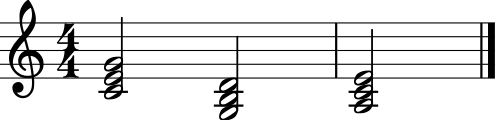

In [34]:
# Let's create a partial progression I-V-vi
p = music21.stream.Part()
p.append(music21.chord.Chord('C4 E4 G4', type='half')) # I
p.append(music21.chord.Chord('G3 B3 D4', type='half')) # V
p.append(music21.chord.Chord('A3 C4 E4', type='half')) # vi
s = music21.stream.Score([p])
chord_item = MusicItem.from_stream(s, vocab)
chord_item.show()

In [25]:
chord_item.data

array([  0,   1,  76, 153,  73, 153,  69, 153,   8, 153,  71, 153,  68, 153,  64, 153,   8, 153,  73, 153,  69, 153,
        66, 153])

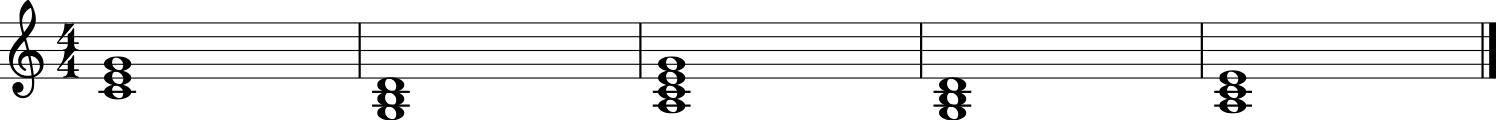

In [26]:
comb = chord_item.append(chord_item)
comb.show()

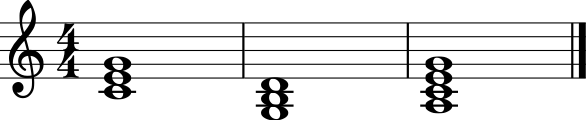

In [27]:
trim = comb.trim_to_beat(12)
trim.show()

In [28]:
trim.data

array([  0,   1,  76, 153,  73, 153,  69, 153,   8, 153,  71, 153,  68, 153,  64, 153,   8, 153,  73, 153,  69, 153,
        66, 153,   0,   1,  76, 153,  73, 153,  69, 153])

In [30]:
# nw_predict_from_midi(learn, chord_item, seed_len=2)

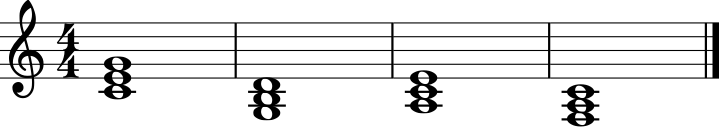

In [31]:
temperaturs = (0.5,0.5) # Let's lower the note randomness for this test

full.show()

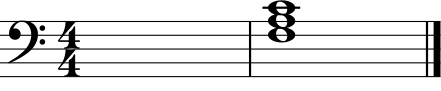

In [32]:
# Predicted chords - IV
pred.show()

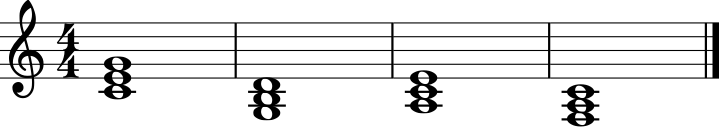

In [33]:
_, full = learn.predict(chord_item, n_words=10, temperatures=(0.5,0.5))
full.show()

Looks like it predicted the most popular progression!

#### Predict without a starting sequence

In [20]:
empty_item = MusicItem.empty(vocab)

In [21]:
pred = learn.predict(empty_item, n_words=200)

Predicted BOS token. Returning prediction...


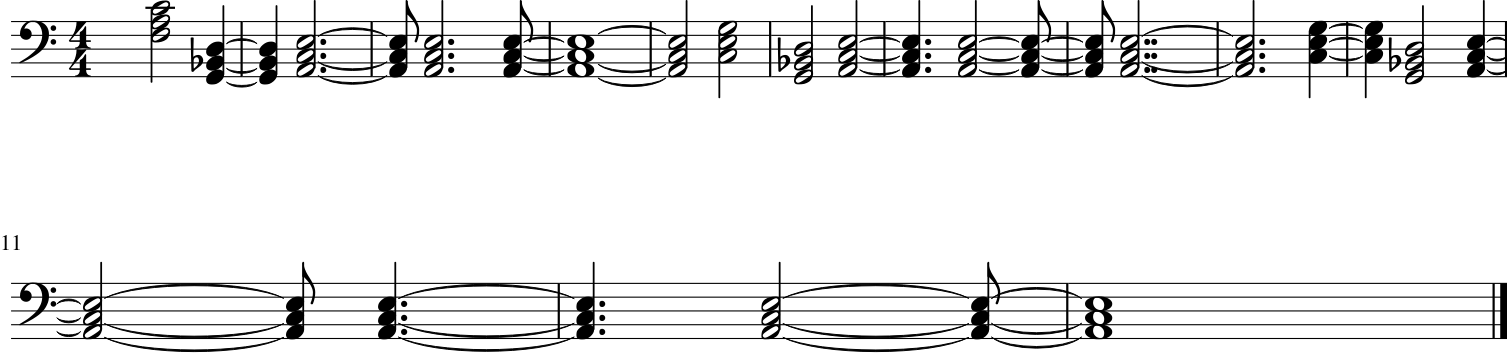

In [22]:
pred.show()